<h1>Heart Attack Risk Analysis and Prediction</h1>

This project involves analyzing an AI-generated dataset designed to mimic real-world heart attack risk factors. The dataset consists of 26 columns and 8,763 entries, containing various health-related attributes listed below:

- Patient ID --- Unique identifier for each patient
- Age --- Age of the patient
- Sex --- Gender of the patient (Male/Female)
- Cholesterol --- Cholesterol levels of the patient
- Blood Pressure --- Blood pressure of the patient (systolic/diastolic)
- Heart Rate --- Heart rate of the patient
- Diabetes --- Whether the patient has diabetes (Yes/No)
- Family History --- Family history of heart-related problems (1: Yes, 0: No)
- Smoking --- Smoking status of the patient (1: Smoker, 0: Non-smoker)
- Obesity --- Obesity status of the patient (1: Obese, 0: Not obese)
- Alcohol Consumption --- Level of alcohol consumption by the patient (1: Yes, 0: No)
- Exercise Hours Per Week --- Number of exercise hours per week
- Diet --- Dietary habits of the patient (Healthy/Average/Unhealthy)
- Previous Heart Problems --- Previous heart problems of the patient (1: Yes, 0: No)
- Medication Use --- Medication usage by the patient (1: Yes, 0: No)
- Stress Level --- Stress level reported by the patient (1-10)
- Sedentary Hours Per Day --- Hours of sedentary activity per day
- Income --- Yearly income level of the patient (in USD)
- BMI --- Body Mass Index (BMI) of the patient
- Triglycerides --- Triglyceride levels of the patient
- Physical Activity Days Per Week --- Days of physical activity per week
- Sleep Hours Per Day --- Hours of sleep per day
- Country --- Country of the patient
- Continent --- Continent where the patient resides
- Hemisphere --- Hemisphere where the patient resides
- Heart Attack Risk --- Presence of heart attack risk (1: Yes, 0: No)

The goal of this project is to extract meaningful insights from the data through exploratory data analysis (EDA) and statistical methods. Additionally, a machine learning model will be developed to predict the probability of a person experiencing a heart attack based on their features. Various evaluation metrics will be used to assess the model’s performance, ensuring it provides accurate and reliable predictions.

<h2>Importing libraries</h2>

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

<h2>1) Importing and analyzing the dataset</h2>

We will load the dataset, and view the first 5 rows to view the imported dataset in more detail.

In [44]:
df = pd.read_csv('heart_attack_prediction_dataset.csv')
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


Now that we have imported the dataset, we will explore the dataset so that we have a general understanding of what the dataset looks like. We will use:

- .shape to denote the number of rows and columns
- .columns to ensure that we have all the desired columns available
- .describe to get a summary for each column of the dataset

In [45]:
print('SHAPE:', df.shape)
print('\nCOLUMNS:\n  ', df.columns)
print('\nSUMMARY:\n', df.describe())

SHAPE: (8763, 26)

COLUMNS:
   Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

SUMMARY:
                Age  Cholesterol   Heart Rate     Diabetes  Family History  \
count  8763.000000  8763.000000  8763.000000  8763.000000     8763.000000   
mean     53.707977   259.877211    75.021682     0.652288        0.492982   
std      21.249509    80.863276    20.550948     0.476271        0.499979   
min      18.000000   120.000000    40.000000     0.000000        0.000000   
25%      35.000000   192.000000    57.000000     0.000000        0.000000   


<h2>2) Data Preprocessing</h2>

We will check our dataset for any missing values. If found, we will have to drop the null columns.

In [46]:
print(df.isnull().sum())

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


Although we do not have any null values in the dataset, we will drop null values as it is good coding practice.

In [47]:
df = df.dropna()
df.shape

(8763, 26)

To make better use of the data, we will set the 'Patient ID' column as the primary key. However, we need to make sure that it meets the requirements of being made the primary key, i.e. it should hold only unique values.

In [48]:
df['Patient ID'].unique().shape[0] == df.shape[0]

True

Now that we are sure that it holds only unique values, we will set 'Patient ID' as the primary key.

In [49]:
df = df.set_index('Patient ID')
df.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
Patient ID,,,,,,,,,,,,,,,,,,,,,
BMW7812,67,Male,208,158/88,72,0,0,1,0,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
CZE1114,21,Male,389,165/93,98,1,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
BNI9906,21,Female,324,174/99,72,1,0,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
JLN3497,84,Male,383,163/100,73,1,1,1,0,1,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
GFO8847,66,Male,318,91/88,93,1,1,1,1,0,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


From here onwards, for the purpose of readability, we will convert the dataset values from numeric to strings. This would provide a better information of the information we have regarding each feature.

In [50]:
df['Sex'] = df['Sex'].replace({'M': 'Male', 'F': 'Female'}) 
df['Diabetes'] = df['Diabetes'].replace({1: 'Yes', 0: 'No', 'Yes': 'Yes', 'No': 'No'})
df['Family History'] = df['Family History'].replace({1: 'Yes', 0: 'No'})
df['Smoking'] = df['Smoking'].replace({1: 'Smoker', 0: 'Non-Smoker'})
df['Obesity'] = df['Obesity'].replace({1: 'Obese', 0: 'Not Obese'})
df['Alcohol Consumption'] = df['Alcohol Consumption'].replace({1: 'Consumes Alcohol', 0: 'Doesnt consume alcohol'})
df['Previous Heart Problems'] = df['Previous Heart Problems'].replace({1: 'Yes', 0: 'No'})
df['Medication Use'] = df['Medication Use'].replace({1: 'Yes', 0: 'No'})
df['Heart Attack Risk'] = df['Heart Attack Risk'].replace({1: 'At Risk', 0: 'No Risk'})

df.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
Patient ID,,,,,,,,,,,,,,,,,,,,,
BMW7812,67,Male,208,158/88,72,No,No,Smoker,Not Obese,Doesnt consume alcohol,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,No Risk
CZE1114,21,Male,389,165/93,98,Yes,Yes,Smoker,Obese,Consumes Alcohol,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,No Risk
BNI9906,21,Female,324,174/99,72,Yes,No,Non-Smoker,Not Obese,Doesnt consume alcohol,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,No Risk
JLN3497,84,Male,383,163/100,73,Yes,Yes,Smoker,Not Obese,Consumes Alcohol,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,No Risk
GFO8847,66,Male,318,91/88,93,Yes,Yes,Smoker,Obese,Doesnt consume alcohol,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,No Risk


Next, we split "Blood Pressure" into two numeric columns, "Systolic" and "Diastolic"

In [51]:
bp_index = df.columns.get_loc("Blood Pressure")
df[['Systolic' , 'Diastolic']]  = df['Blood Pressure'].str.split('/', expand = True).astype(int)
df.drop(columns=['Blood Pressure'], inplace=True)
df = pd.concat([df.iloc[:, :bp_index], df[['Systolic' , 'Diastolic']], df.iloc[:, bp_index:]], axis=1)
df.head()

,Age,Sex,Cholesterol,Systolic,Diastolic,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic,Diastolic
Patient ID,,,,,,,,,,,,,,,,,,,,,
BMW7812,67,Male,208,158,88,72,No,No,Smoker,Not Obese,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,No Risk,158,88
CZE1114,21,Male,389,165,93,98,Yes,Yes,Smoker,Obese,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,No Risk,165,93
BNI9906,21,Female,324,174,99,72,Yes,No,Non-Smoker,Not Obese,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,No Risk,174,99
JLN3497,84,Male,383,163,100,73,Yes,Yes,Smoker,Not Obese,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,No Risk,163,100
GFO8847,66,Male,318,91,88,93,Yes,Yes,Smoker,Obese,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,No Risk,91,88


<h2>3) Data Visualization</h2>

We will now investigate to see how many individuals in the dataset pose a heart attack risk as compared to ones who don't. 

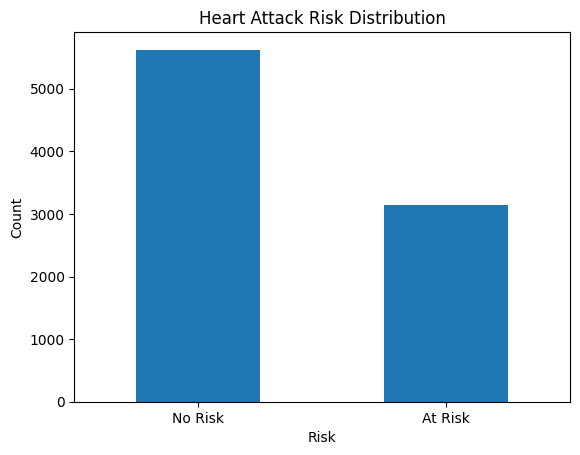

In [52]:
df['Heart Attack Risk'].value_counts().plot(kind='bar')
plt.title('Heart Attack Risk Distribution')
plt.xlabel('Risk')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Seeing that there is some difference in the number of individuals having heart attack against those who do not, we will check for class imbalances in any other feature as well. As we have divided our dataset into two main streams - clinical and demographic factors - we will view the details accordingly:

<h3>i. Clinical factors</h3>

C:\Users\Codew\AppData\Local\Temp\ipykernel_42188\129525639.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df[col], palette='Set2', order=df[col].value_counts().index)


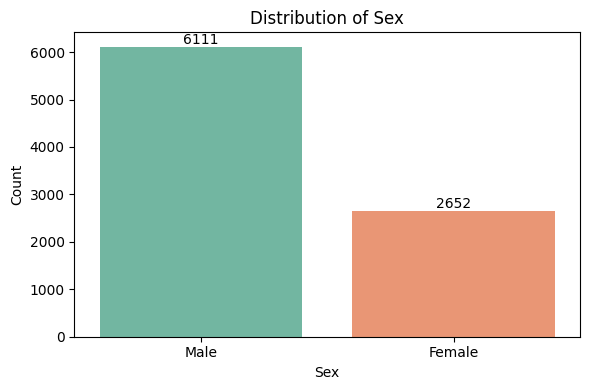

C:\Users\Codew\AppData\Local\Temp\ipykernel_42188\129525639.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df[col], palette='Set2', order=df[col].value_counts().index)


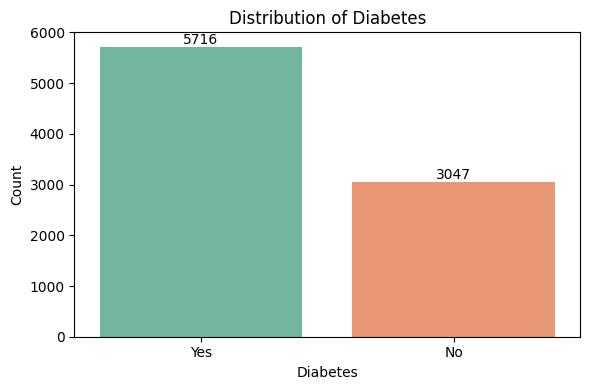

C:\Users\Codew\AppData\Local\Temp\ipykernel_42188\129525639.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df[col], palette='Set2', order=df[col].value_counts().index)


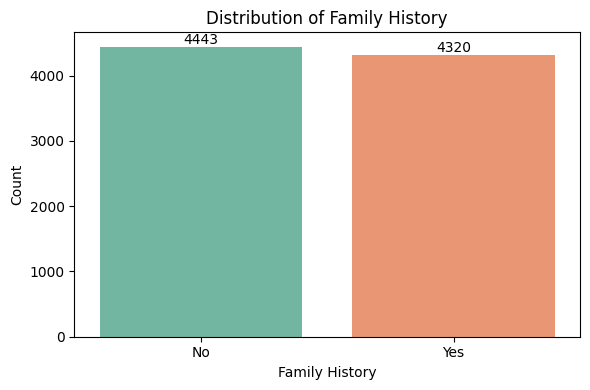

C:\Users\Codew\AppData\Local\Temp\ipykernel_42188\129525639.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df[col], palette='Set2', order=df[col].value_counts().index)


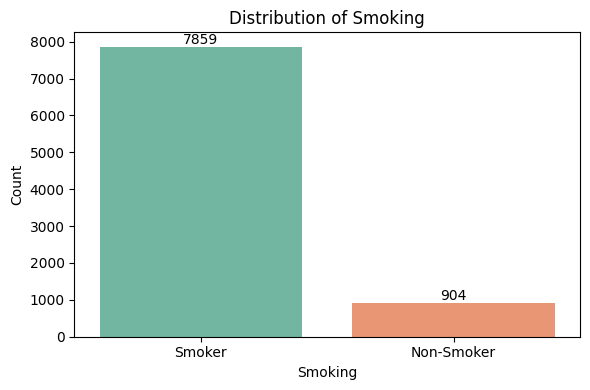

C:\Users\Codew\AppData\Local\Temp\ipykernel_42188\129525639.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df[col], palette='Set2', order=df[col].value_counts().index)


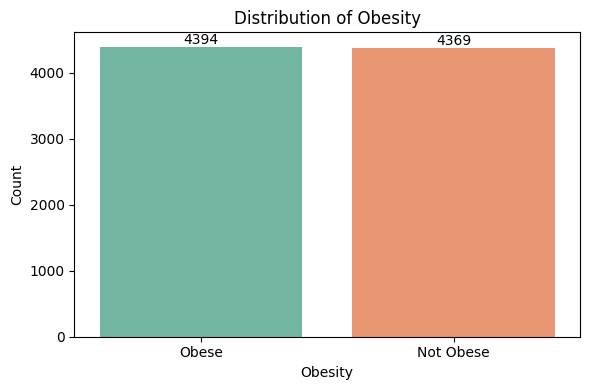

C:\Users\Codew\AppData\Local\Temp\ipykernel_42188\129525639.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df[col], palette='Set2', order=df[col].value_counts().index)


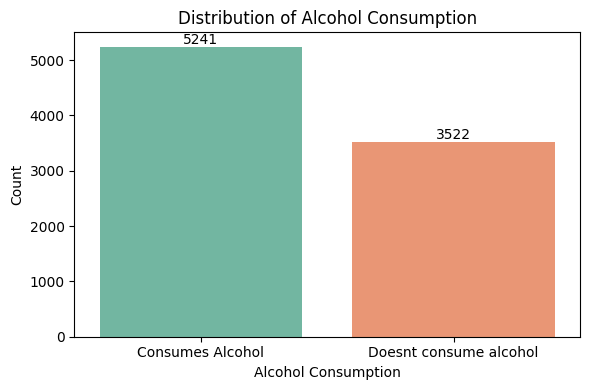

C:\Users\Codew\AppData\Local\Temp\ipykernel_42188\129525639.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df[col], palette='Set2', order=df[col].value_counts().index)


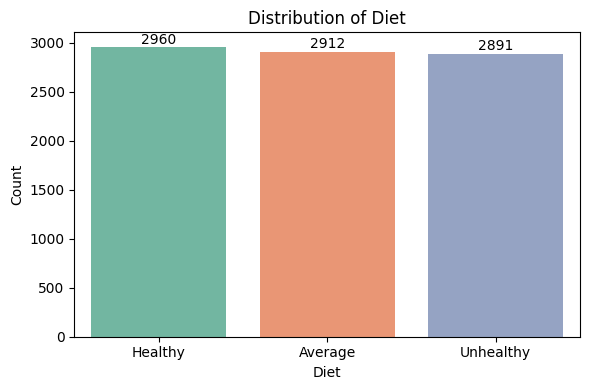

C:\Users\Codew\AppData\Local\Temp\ipykernel_42188\129525639.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df[col], palette='Set2', order=df[col].value_counts().index)


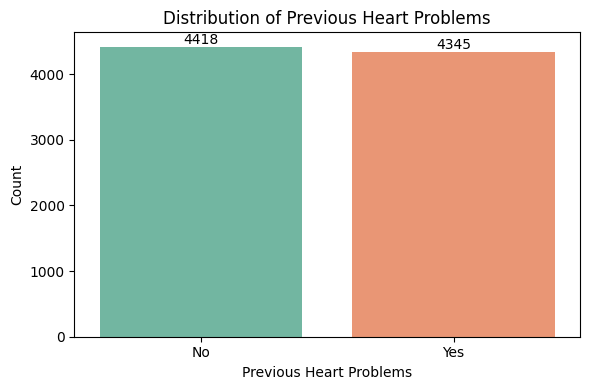

C:\Users\Codew\AppData\Local\Temp\ipykernel_42188\129525639.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df[col], palette='Set2', order=df[col].value_counts().index)


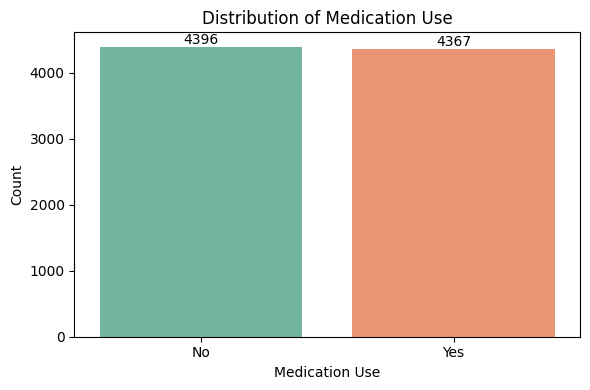

In [55]:
# categorical_cols = ['Sex', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 
#                     'Alcohol Consumption', 'Diet', 'Previous Heart Problems', 
#                     'Medication Use', 'Continent', 'Hemisphere']

# Make different graphs for triglycerides, cholesterol levels, and age
clinical_factors = ['Sex', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 
                    'Alcohol Consumption', 'Diet', 'Previous Heart Problems', 'Medication Use']

for col in clinical_factors:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(x=df[col], palette='Set2', order=df[col].value_counts().index)

    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=0)

    # Add counts on top of bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 1, int(height), ha="center", va="bottom")

    plt.tight_layout()
    plt.show()

<h3>ii. Demographic factors</h3>

In [ ]:
demographic_factors = ['Exercise Hours Per Week', 'Stress Level', 'Income', 'Sedentary Hours Per Day', 
                       'Physical Activity Days Per Week', 'Sleep Hours per Day', 'Continent', 'Hemisphere']

for col in demographic_factors:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col], hue=df[col], palette='Set2', order=df[col].value_counts().index, legend=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(y=df['Country'], order=df['Country'].value_counts().index, palette='Set2',hue=df['Country'],)
plt.title('Distribution by Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

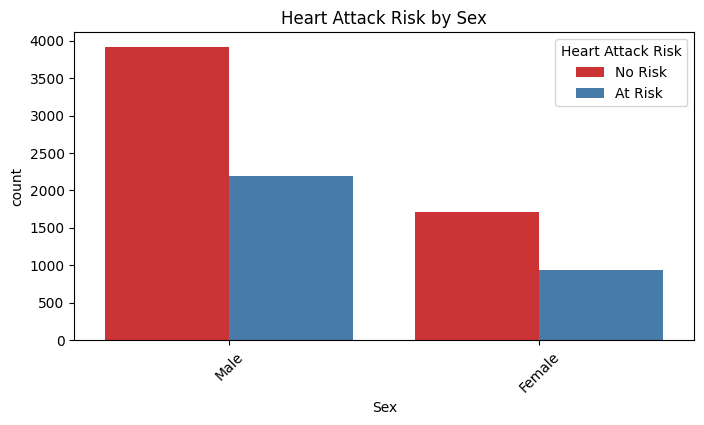

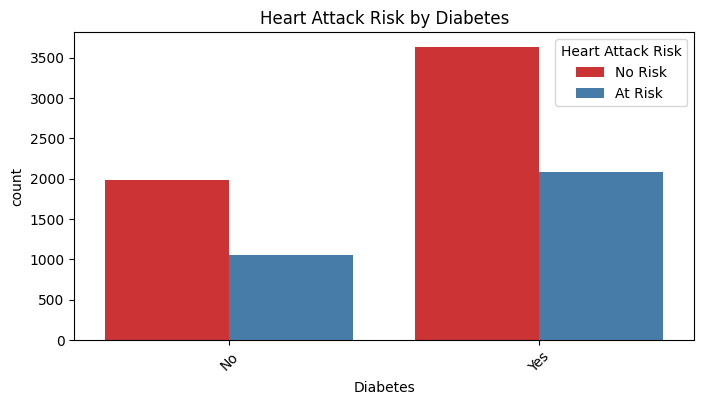

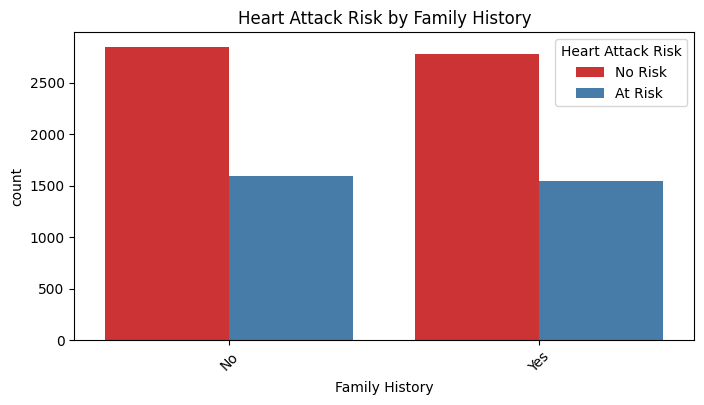

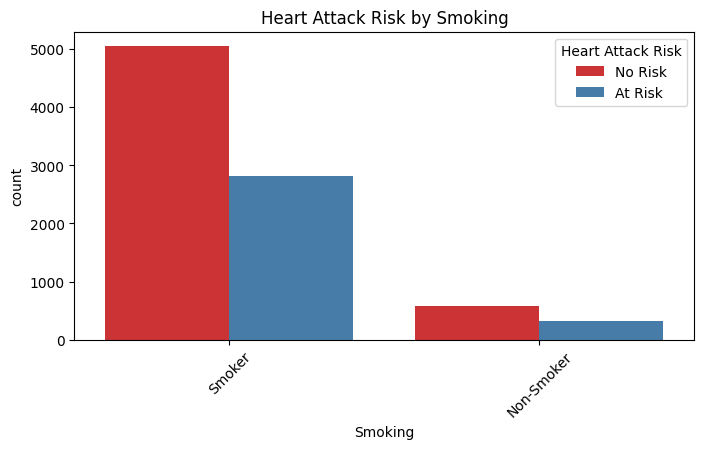

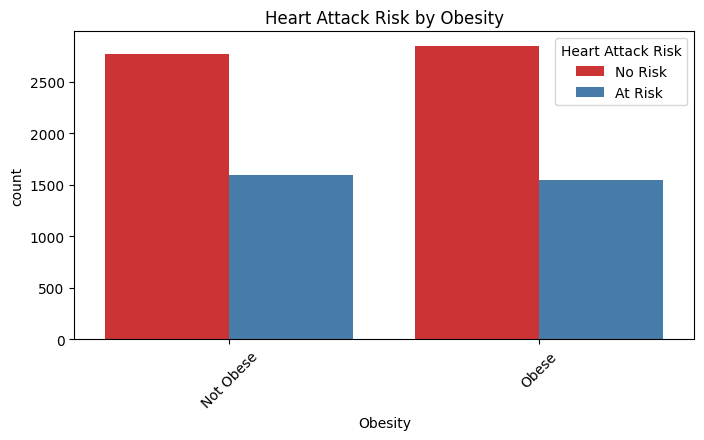

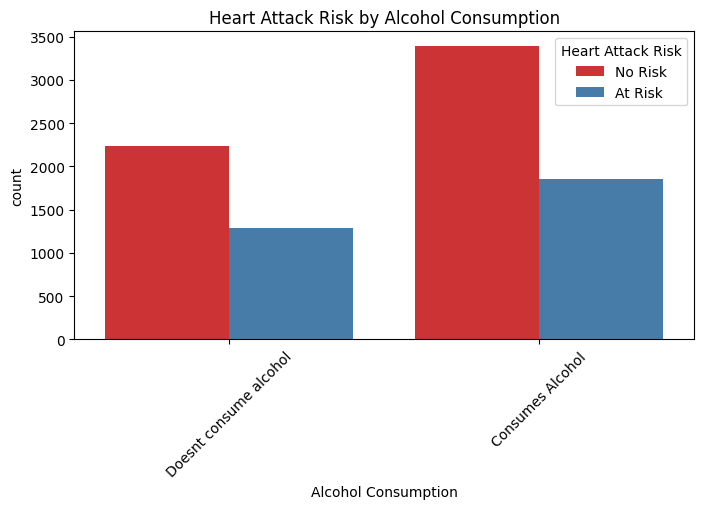

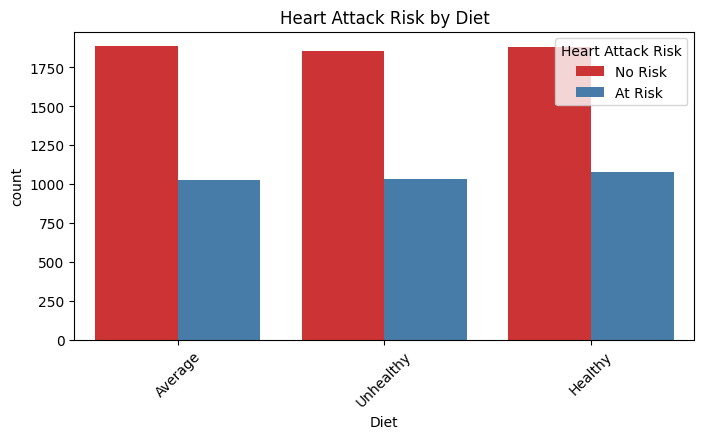

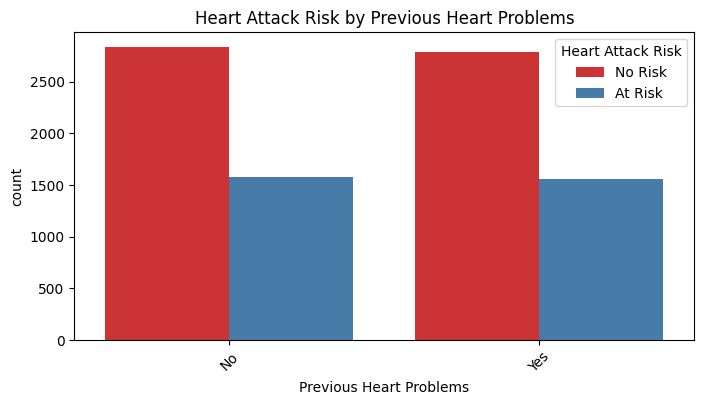

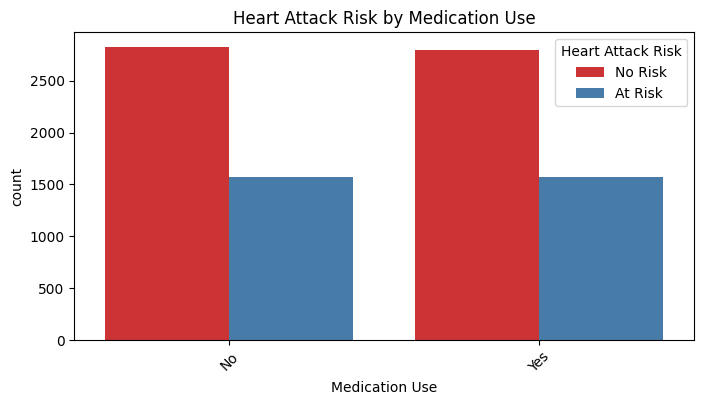

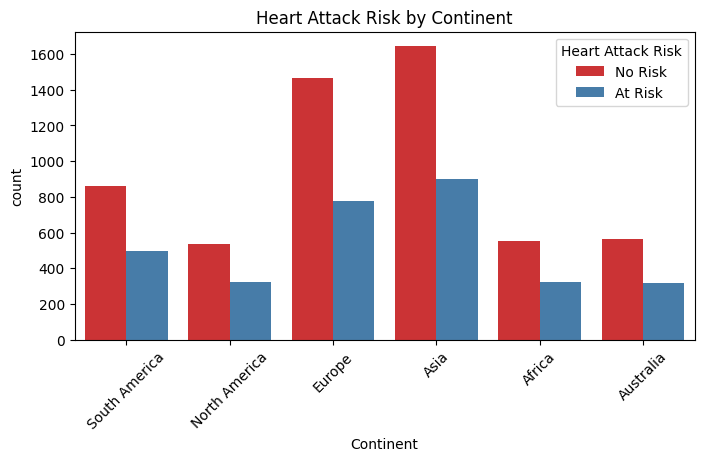

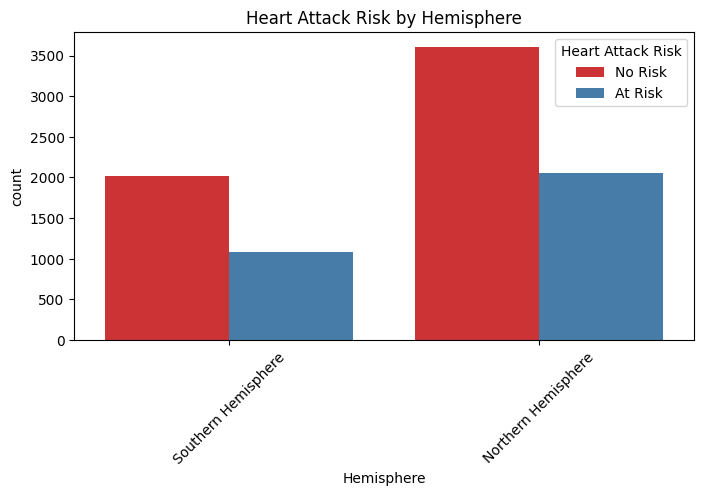

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col], hue=df['Heart Attack Risk'], palette='Set1')
    plt.title(f'Heart Attack Risk by {col}')
    plt.xticks(rotation=45)
    plt.legend(title='Heart Attack Risk')
    plt.show()